In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import pickle as pkl
import glob
import ranking as rm

In [2]:
result_dict={}

In [15]:
%run -i 'simulations_metrics.py'

/h/shalmali/anaconda3/envs/tsx/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


---------------------------------------------------thr: 0.5
FFC &  0.6321 +- 0.0  &  0.2696 +- 0.0 \\
Cond &  0.4448 +- 0.0  &  0.047 +- 0.0 \\
AFO &  0.7949 +- 0.0  &  0.0474 +- 0.0 \\
FO &  0.7944 +- 0.0  &  0.0471 +- 0.0 \\
Sens &  0.7306 +- 0.0  &  0.0481 +- 0.0 \\
LIME &  0.6077 +- 0.0  &  0.0308 +- 0.0 \\
True Gen &  0.5 +- 0.0  &  0.0184 +- 0.0 \\


In [85]:
key='100'
result_dict[key]={}
result_dict[key]['ffc'] = [auc_ffc, auprc_ffc]
result_dict[key]['afo'] = [auc_afo, auprc_afo]
result_dict[key]['fo'] = [auc_fo, auprc_fo]
result_dict[key]['sens'] = [auc_sens, auprc_sens]
result_dict[key]['lime'] = [auc_lime, auprc_lime]

In [86]:
result_dict

{'1': {'ffc': [[0.8919056566452551], [0.19869590852318547]],
  'afo': [[0.7203571827800862], [0.02998556903602677]],
  'fo': [[0.7209214482529623], [0.02939011107373216]],
  'sens': [[0.7036553319651587], [0.037474044302735716]],
  'lime': [[0.3811404906507465], [0.01666594012992085]]},
 '2': {'ffc': [[0.9039421536592416], [0.20725364670377183]],
  'afo': [[0.7098518817448699], [0.029894218439061995]],
  'fo': [[0.7298982890648864], [0.030571193376707308]],
  'sens': [[0.7094669036891281], [0.037108558493315374]],
  'lime': [[0.5380664151086486], [0.01901999113361064]]},
 '5': {'ffc': [[0.8999968125267571], [0.15668776425606507]],
  'afo': [[0.714158024489338], [0.02865253785130955]],
  'fo': [[0.7231979785439152], [0.029368432586792455]],
  'sens': [[0.7122119798223401], [0.03763074621743471]],
  'lime': [[0.5608462556955407], [0.021146627009428473]]},
 '10': {'ffc': [[0.9335259771752739], [0.23625467423042695]],
  'afo': [[0.7031667769345784], [0.02772167454977822]],
  'fo': [[0.7196

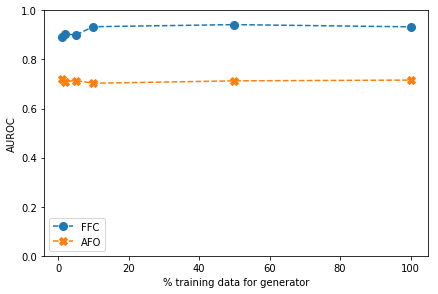

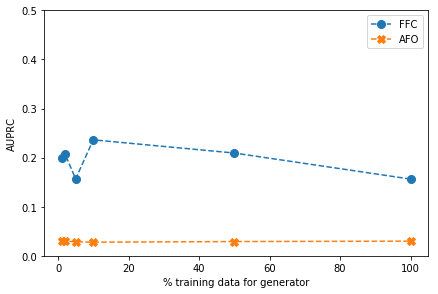

In [89]:
x_vec = [int(x) for x in list(result_dict.keys())]
markers_methods = ['o','X','*','D','>']
ccolors = plt.get_cmap('tab10')(np.arange(len(markers_methods), dtype=int))
#AUC plot
plt.figure()
plt.plot(x_vec, [result_dict[str(key)]['ffc'][0] for key in x_vec],marker=markers_methods[0],color=ccolors[0],
         linestyle='--',markersize=8,label='FFC')
plt.plot(x_vec, [result_dict[str(key)]['afo'][0] for key in x_vec],marker=markers_methods[1],color=ccolors[1],
         linestyle='--',markersize=8,label='AFO')
#plt.plot(x_vec, [result_dict[str(key)]['fo'][0] for key in x_vec],marker=markers_methods[2],color=ccolors[2],
#         linestyle='--',markersize=8,label='FO')
#plt.plot(x_vec, [result_dict[str(key)]['sens'][0] for key in x_vec],marker=markers_methods[3],color=ccolors[3],
#         linestyle='--',markersize=8,label='Sens')
#plt.plot(x_vec, [result_dict[str(key)]['lime'][0] for key in x_vec],marker=markers_methods[4],color=ccolors[4],
#         linestyle='--',markersize=8,label='LIME')
plt.legend()
plt.ylim([0.0,1.0])
plt.tight_layout()
plt.xlabel('% training data for generator')
plt.ylabel('AUROC')
plt.savefig('AUROC_percent.png', dpi=300)

plt.figure()
plt.plot(x_vec, [result_dict[str(key)]['ffc'][1] for key in x_vec],marker=markers_methods[0],color=ccolors[0],
         linestyle='--',markersize=8,label='FFC')
plt.plot(x_vec, [result_dict[str(key)]['afo'][1] for key in x_vec],marker=markers_methods[1],color=ccolors[1],
         linestyle='--',markersize=8,label='AFO')
#plt.plot(x_vec, [result_dict[str(key)]['fo'][0] for key in x_vec],marker=markers_methods[2],color=ccolors[2],
#         linestyle='--',markersize=8,label='FO')
#plt.plot(x_vec, [result_dict[str(key)]['sens'][0] for key in x_vec],marker=markers_methods[3],color=ccolors[3],
#         linestyle='--',markersize=8,label='Sens')
#plt.plot(x_vec, [result_dict[str(key)]['lime'][0] for key in x_vec],marker=markers_methods[4],color=ccolors[4],
#         linestyle='--',markersize=8,label='LIME')
plt.legend()
plt.ylim([0.0,0.5])
plt.tight_layout()
plt.xlabel('% training data for generator')
plt.ylabel('AUPRC')
plt.savefig('AUPRC_percent.png', dpi=300)

In [17]:
#preprocess before metric collection
filelist = glob.glob('/scratch/gobi1/shalmali/simulation_spike/results_*.pkl')
Tt=79
N=len(filelist)
n_features=3
y_true=np.zeros(n_features*N*Tt)
y_ffc=np.zeros(n_features*N*Tt)
y_afo=np.zeros(n_features*N*Tt)
y_suresh=np.zeros(n_features*N*Tt)
y_sens=np.zeros(n_features*N*Tt)

y_true_rk0=np.zeros((n_features, N*Tt)).T
y_true_rk=np.zeros((n_features, N*Tt)).T
y_ffc_rk=np.zeros((n_features, N*Tt)).T
y_afo_rk=np.zeros((n_features, N*Tt)).T
y_suresh_rk=np.zeros((n_features, N*Tt)).T
y_sens_rk=np.zeros((n_features, N*Tt)).T

plot=0



for n,file in enumerate(filelist):
    with open(file,'rb') as f:
        arr = pkl.load(f)
    n_obs=Tt*n_features
    gt_array = np.zeros((n_features,Tt))
    gt_array[0,:] = arr['gt'][1:]
    y_true[n*n_obs:(n+1)*n_obs] = gt_array.flatten()
    y_ffc[n*n_obs:(n+1)*n_obs] = arr['FFC']['imp'].flatten()
    y_afo[n*n_obs:(n+1)*n_obs] = arr['AFO']['imp'].flatten()
    y_suresh[n*n_obs:(n+1)*n_obs] = arr['Suresh_et_al']['imp'].flatten()
    y_sens[n*n_obs:(n+1)*n_obs] = arr['Sens']['imp'][:,1:].flatten()
    
    n_obs = Tt
    y_true_rk0[n*n_obs:(n+1)*n_obs,:] = gt_array.T
    y_ffc_rk[n*n_obs:(n+1)*n_obs,:] = arr['FFC']['imp'].T
    y_afo_rk[n*n_obs:(n+1)*n_obs,:] = arr['AFO']['imp'].T
    y_suresh_rk[n*n_obs:(n+1)*n_obs,:] = arr['Suresh_et_al']['imp'].T
    y_sens_rk[n*n_obs:(n+1)*n_obs,:] = arr['Sens']['imp'][:,1:].T

    if plot:
        plt.figure()
        plt.plot(y_true[n*n_obs:(n+1)*n_obs],label='true')
        plt.plot(y_ffc[n*n_obs:(n+1)*n_obs],label='ffc')
        plt.plot(y_afo[n*n_obs:(n+1)*n_obs],label='afo')
        plt.plot(y_suresh[n*n_obs:(n+1)*n_obs],label='suresh_et_al')
        plt.plot(y_sens[n*n_obs:(n+1)*n_obs],label='sens')
        plt.legend()

y_true_rk[:,0] = 0
y_true_rk[:,1] = np.array([1 if x==1 else 2 for x in y_true_rk0[:,1]])
y_true_rk[:,2] =np.array([2 if x==1 else 1 for x in y_true_rk0[:,1]])

y_ffc_rk = np.flip(np.argsort(y_ffc_rk,axis=1),axis=1)
y_afo_rk = np.flip(np.argsort(y_afo_rk,axis=1),axis=1)
y_suresh_rk = np.flip(np.argsort(y_suresh_rk,axis=1),axis=1)
y_sens_rk = np.flip(np.argsort(y_sens_rk,axis=1),axis=1)

#print metrics
auc_ffc= metrics.roc_auc_score(y_true, y_ffc)
auc_afo= metrics.roc_auc_score(y_true, y_afo)
auc_suresh= metrics.roc_auc_score(y_true, y_suresh)
auc_sens= metrics.roc_auc_score(y_true, y_sens)
    
'''
# recall/sensitivity
report_ffc = metrics.classification_report(y_true, y_ffc)
report_afo = metrics.classification_report(y_true, y_afo)
report_suresh = metrics.classification_report(y_true, y_suresh)
report_sens = metrics.classification_report(y_true, y_sens)
'''
    
# auprc
auprc_ffc= metrics.average_precision_score(y_true, y_ffc)
auprc_afo= metrics.average_precision_score(y_true, y_afo)
auprc_suresh= metrics.average_precision_score(y_true, y_suresh)
auprc_sens= metrics.average_precision_score(y_true, y_sens)

'''
print('FFC - AUC: ',auc_ffc, ' Sensitivity: ',report_ffc['recall'], ' AUPRC: ',  auprc_ffc)
print('AFO - AUC: ',auc_afo, ' Sensitivity: ',report_afo['recall'], ' AUPRC: ',  auprc_afo)
print('Suresh - AUC: ',auc_suresh, ' Sensitivity: ',report_suresh['recall'], ' AUPRC: ',  auprc_suresh)
print('Sens - AUC: ',auc_sens, ' Sensitivity: ',report_sens['recall'], ' AUPRC: ',  auprc_sens)
'''

print('FFC & ', round(auc_ffc,4),  ' & ',  round(auprc_ffc,4) , '\\\\')
print('AFO &',round(auc_afo,4),  ' & ',  round(auprc_afo,4), '\\\\')
print('Suresh & ',round(auc_suresh,4),  ' & ',  round(auprc_suresh,4), '\\\\')
print('Sens & ',round(auc_sens,4),  ' & ',  round(auprc_sens,4), '\\\\')

FFC &  0.749  &  0.4781 \\
AFO & 0.7314  &  0.1903 \\
Suresh &  0.6079  &  0.0021 \\
Sens &  0.4283  &  0.0034 \\


In [7]:
prec_at_k_ffc = rm.precision_at(y_ffc_rk, y_true_rk, k=1, assume_unique=True)
map_rk_ffc = rm.mean_average_precision(y_ffc_rk, y_true_rk, assume_unique=True)
ndcg_at_k_ffc = rm.ndcg_at(y_ffc_rk, y_true_rk, k=1, assume_unique=True)

prec_at_k_afo = rm.precision_at(y_afo_rk, y_true_rk, k=1, assume_unique=True)
map_rk_afo = rm.mean_average_precision(y_afo_rk, y_true_rk, assume_unique=True)
ndcg_at_k_afo = rm.ndcg_at(y_afo_rk, y_true_rk, k=1, assume_unique=True)

prec_at_k_suresh = rm.precision_at(y_suresh_rk, y_true_rk, k=1, assume_unique=True)
map_rk_suresh = rm.mean_average_precision(y_suresh_rk, y_true_rk, assume_unique=True)
ndcg_at_k_suresh = rm.ndcg_at(y_suresh_rk, y_true_rk, k=1, assume_unique=True)

prec_at_k_sens = rm.precision_at(y_sens_rk, y_true_rk, k=1, assume_unique=True)
map_rk_sens = rm.mean_average_precision(y_sens_rk, y_true_rk, assume_unique=True)
ndcg_at_k_sens = rm.ndcg_at(y_sens_rk, y_true_rk, k=1, assume_unique=True)

print('FFC & ', round(prec_at_k_ffc,4),  ' & ',  round(map_rk_ffc,4) , '& ' ,round(ndcg_at_k_ffc,4),'\\\\')
print('AFO &',round(prec_at_k_afo,4),  ' & ',  round(map_rk_afo,4), '&', round(ndcg_at_k_afo,4),'\\\\')
print('Suresh & ',round(prec_at_k_suresh,4),  ' & ',  round(map_rk_suresh,4), '&',round(ndcg_at_k_suresh,4),'\\\\')
print('Sens & ',round(prec_at_k_sens,4),  ' & ',  round(map_rk_sens,4), '&', round(ndcg_at_k_sens,4),'\\\\')

FFC &  1.0  &  1.0 &  1.0 \\
AFO & 1.0  &  1.0 & 1.0 \\
Suresh &  1.0  &  1.0 & 1.0 \\
Sens &  1.0  &  1.0 & 1.0 \\


In [32]:
with open('../data/simulated_data/state_dataset_logits_train.pkl','rb') as f:
    logits = pkl.load(f)

In [33]:
logits.shape

(800, 200)

In [34]:
with open('../data/simulated_data/state_dataset_importance_train.pkl','rb') as f:
    importance = pkl.load(f)
state = np.zeros(logits.shape,dtype=int)
y_logit_1=[]
y_logit_2=[]
for n in range(importance.shape[0]):
    for t in range(importance[n].shape[0]):
        if importance[n,t,0]==1 and importance[n,t,2]==1:
            y_logit_2.append(logits[n,t])
        elif importance[n,t,1]==1 and importance[n,t,2]==1:
            y_logit_1.append(logits[n,t])
            
y_logit_1=np.array(y_logit_1)
y_logit_2=np.array(y_logit_2)

In [35]:
y_logit_1.shape, y_logit_2.shape

((79758,), (80242,))

(array([2.4000e+01, 6.7000e+01, 2.4400e+02, 6.9100e+02, 1.4870e+03,
        3.1480e+03, 6.1580e+03, 1.2237e+04, 2.4460e+04, 3.1242e+04]),
 array([0.07619638, 0.16844263, 0.26068887, 0.35293511, 0.44518136,
        0.5374276 , 0.62967384, 0.72192009, 0.81416633, 0.90641257,
        0.99865882]),
 <a list of 10 Patch objects>)

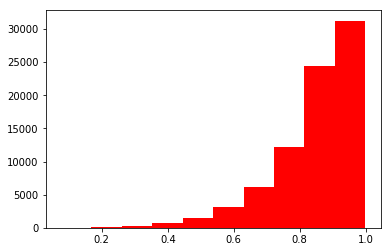

In [36]:
plt.hist(y_logit_1,color='r')

(array([1.842e+04, 6.808e+03, 2.284e+03, 8.740e+02, 3.530e+02, 1.680e+02,
        5.500e+01, 2.700e+01, 9.000e+00, 3.000e+00]),
 array([5.85928567e-04, 7.91708254e-02, 1.57755722e-01, 2.36340619e-01,
        3.14925516e-01, 3.93510412e-01, 4.72095309e-01, 5.50680206e-01,
        6.29265103e-01, 7.07850000e-01, 7.86434896e-01]),
 <a list of 10 Patch objects>)

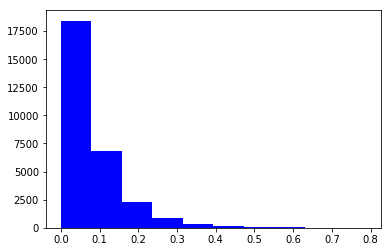

In [29]:
plt.hist(y_logit_2,color='b')

In [53]:
from scipy.special import expit
def decay(x):
    return 0.8*(1-0.03)**x

In [54]:
import numpy as np
prob=np.zeros((200))
for t in range(200):
    prob[t] = decay(t)

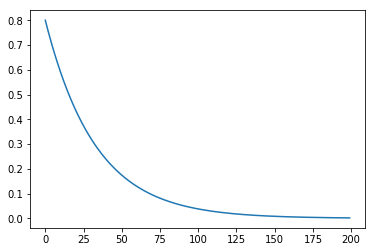

In [55]:
plt.plot(prob)